In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display


In [2]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
from matplotlib import rcParams

# Definimos path
path = '/home/daniufundar/Documents/Fundar/graficos-indice-desigualdad-genero/'

# Definimos fuente para los graficos
font_dir = [path + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'

# Definimos colores fundar
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']
fundar_white = '#F5F5F5'
fundar_black = '#151515'

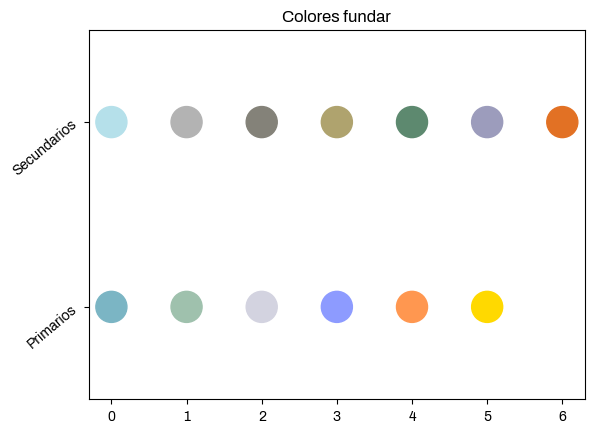

In [7]:
import matplotlib.colors as mcolors

rgba_colors = [mcolors.to_rgba(color) for color in fundar_colores_primarios]
x = np.arange(len(fundar_colores_primarios))
y = [1]*len(fundar_colores_primarios)
plt.scatter(x, y, s=500, color=rgba_colors)

rgba_colors = [mcolors.to_rgba(color) for color in fundar_colores_secundarios]
x = np.arange(len(fundar_colores_secundarios))
y = [2]*len(fundar_colores_secundarios)
plt.scatter(x, y, s=500, color=rgba_colors)
plt.ylim([.5, 2.5])
plt.title('Colores fundar')
plt.yticks([1, 2], labels=['Primarios', 'Secundarios'], rotation=40)

plt.show()

In [8]:
pathdata = '/home/daniu/Documentos/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'

df_people_2016 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_16.txt', delimiter=';', low_memory=False)
df_people_2017 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_17.txt', delimiter=';', low_memory=False)
df_people_2018 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_18.txt', delimiter=';', low_memory=False)
df_people_2019 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_19.txt', delimiter=';', low_memory=False)
df_people_2020 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_20.txt', delimiter=';', low_memory=False)
df_people_2021 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_21.txt', delimiter=';', low_memory=False)
df_people_2022 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_22.txt', delimiter=';', low_memory=False)

In [ ]:
import numpy as np
import pandas as pd

In [9]:
def generate_table(df_people):
    # Calculate total population
    pob = df_people['PONDERA'].sum()

    # Calculate number of observations
    cantidad_observaciones = len(df_people)

    # Calculate number of surveys performed
    encuesta_realizada = df_people[df_people['H15'] == 1]['H15'].count()
    pob_encuesta_realizada = df_people[df_people['H15'] == 1]['PONDERA'].sum()

    # Calculate number of imputed surveys
    encuesta_imputada = df_people[df_people['IMPUTA']==1]['IMPUTA'].count()
    pob_encuesta_imputada = df_people[df_people['IMPUTA'] == 1]['PONDERA'].sum()

    # Create the table as a pandas dataframe
    data = {'Parameter': ['Population', 'Number of Observations', 'Number of Surveys Performed', 'Population of Surveys Performed', 'Number of Imputed Surveys', 'Population of Imputed Surveys'],
            'Value': [pob, cantidad_observaciones, encuesta_realizada, pob_encuesta_realizada, encuesta_imputada, pob_encuesta_imputada]}
    table = pd.DataFrame(data)
    table.set_index('Parameter', inplace=True)
    
    return table

In [44]:
def calculate_grouped_income(df, year):
    income = df[['CH06', 'CH04','P47T','PONDII','PONDERA']].copy()
    income['gender'] = np.where(income['CH04']==1, 'male', 'female')
    income_grouped = income.groupby(['CH06', 'P47T', 'gender'], as_index=False).agg({'PONDII': 'sum'}).sort_values(by='P47T', ascending=True).dropna()
    income_grouped.columns = ['CH06','income', 'gender', 'weights']
    income_grouped['year'] = year

    return income_grouped

In [102]:
def plot_income_histogram(income_df, x0, x1, y0, y1, xlim=None, ylim=None, filename=None):

    # Find the maximum income value in the data
    max_income = income_df['income'].max()

    # Create the bin edges using np.arange()
    bin_edges = np.arange(0, max_income + 10000, 10000)

    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes([0.05, 0.05, 0.955, 0.955])
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    sns.histplot(data=income_df, x='income', weights='weights', bins=bin_edges, ax=ax, color=fundar_colores_primarios[4]) # intervalo de 10k pesos
    ax.set_xlabel('Ingreso')
    ax.set_ylabel('Cantidad de personas')
    ax.set_xlim([-1e4, 4.5e6])
    ax.set_ylim([0, 2e7])

    bin_edges = np.arange(0, max_income + 5000, 5000)

    bx = plt.axes([0.35, 0.3, 0.55, 0.55])
    sns.histplot(data=income_df[income_df['income']!=0], x='income', weights='weights', bins=bin_edges, ax=bx, color=fundar_colores_primarios[4]) # intervalo de 5k pesos
    bx.set_xlim([x0, x1])
    bx.set_ylim([y0, y1])
    bx.set_ylabel('Cantidad de personas')
    bx.set_xlabel('Ingreso')

    # create rectangle patch object
    rect = Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')
    # add rectangle to plot
    ax.add_patch(rect)

    # add markers for mean, median, and quartiles
    mean_salary = income_df['income'].mean()
    median_salary = income_df['income'].median()
    q1_salary = income_df['income'].quantile(0.25)
    q3_salary = income_df['income'].quantile(0.75)

    plt.ticklabel_format(style='sci', axis='both')

    bx.axvline(mean_salary, color=fundar_colores_secundarios[5], linestyle='--', label='Mean')
    bx.annotate(f'Media:\n{int(mean_salary)}', xy=(mean_salary, y1*0.9), xytext=(mean_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[5], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[5], fontsize=8)

    bx.axvline(median_salary, color=fundar_colores_secundarios[3], linestyle='--', label='Median')
    bx.annotate(f'Mediana:\n{int(median_salary)}', xy=(median_salary, y1*0.9), xytext=(median_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[3], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[3], fontsize=8)

    bx.axvline(q1_salary, color=fundar_black, linestyle='-', label='Q1')
    bx.annotate(f'Q25:\n{int(q1_salary)}', xy=(q1_salary, y1*0.9), xytext=(q1_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.axvline(q3_salary, color=fundar_black, linestyle='-', label='Q3')
    bx.annotate(f'Q75:\n{int(q3_salary)}', xy=(q3_salary, y1*0.9), xytext=(q3_salary + 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.legend(loc='upper right', frameon=False)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
 
    if filename is not None:
        fig.savefig(filename + '.png', dpi=300, bbox_inches='tight')
        fig.savefig(filename + '.pdf', bbox_inches='tight')


In [117]:
def plot_income_histogram_male(income_df, x0, x1, y0, y1, xlim=None, ylim=None, filename=None):

    male_df = income_df[income_df['gender'] == 'male']

    # Find the maximum income value in the data
    max_income = male_df['income'].max()

    # Create the bin edges using np.arange()
    bin_edges = np.arange(0, max_income + 10000, 10000)

    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes([0.05, 0.05, 0.955, 0.955])
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    sns.histplot(data=male_df, x='income', weights='weights', bins=bin_edges, ax=ax, color=fundar_colores_primarios[0]) # intervalo de 10k pesos
    ax.set_xlabel('Ingreso')
    ax.set_ylabel('Cantidad de personas')
    ax.set_xlim([-1e4, 4.5e6])
    ax.set_ylim([0, 2e7])

    bin_edges = np.arange(0, max_income + 5000, 5000)

    bx = plt.axes([0.35, 0.3, 0.55, 0.55])
    sns.histplot(data=male_df[male_df['income']!=0], x='income', weights='weights', bins=bin_edges, ax=bx, color=fundar_colores_primarios[0]) # intervalo de 5k pesos
    bx.set_xlim([x0, x1])
    bx.set_ylim([y0, y1])
    bx.set_ylabel('Cantidad de personas')
    bx.set_xlabel('Ingreso')

    # create rectangle patch object
    rect = Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')
    # add rectangle to plot
    ax.add_patch(rect)

    # add markers for mean, median, and quartiles
    mean_salary = male_df['income'].mean()
    median_salary = male_df['income'].median()
    q1_salary = male_df['income'].quantile(0.25)
    q3_salary = male_df['income'].quantile(0.75)

    plt.ticklabel_format(style='sci', axis='both')

    bx.axvline(mean_salary, color=fundar_colores_secundarios[5], linestyle='--', label='Mean')
    bx.annotate(f'Media:\n{int(mean_salary)}', xy=(mean_salary, y1*0.9), xytext=(mean_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[5], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[5], fontsize=8)

    bx.axvline(median_salary, color=fundar_colores_secundarios[3], linestyle='--', label='Median')
    bx.annotate(f'Mediana:\n{int(median_salary)}', xy=(median_salary, y1*0.9), xytext=(median_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[3], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[3], fontsize=8)

    bx.axvline(q1_salary, color=fundar_black, linestyle='-', label='Q1')
    bx.annotate(f'Q25:\n{int(q1_salary)}', xy=(q1_salary, y1*0.9), xytext=(q1_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.axvline(q3_salary, color=fundar_black, linestyle='-', label='Q3')
    bx.annotate(f'Q75:\n{int(q3_salary)}', xy=(q3_salary, y1*0.9), xytext=(q3_salary + 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.legend(loc='upper right', frameon=False)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
 
    if filename is not None:
        fig.savefig(filename + '.png', dpi=300, bbox_inches='tight')
        fig.savefig(filename + '.pdf', bbox_inches='tight')

def plot_income_histogram_female(income_df, x0, x1, y0, y1, xlim=None, ylim=None, filename=None):

    female_df = income_df[income_df['gender'] == 'female']

    # Find the maximum income value in the data
    max_income = female_df['income'].max()

    # Create the bin edges using np.arange()
    bin_edges = np.arange(0, max_income + 10000, 10000)

    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes([0.05, 0.05, 0.955, 0.955])
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    sns.histplot(data=female_df, x='income', weights='weights', bins=bin_edges, ax=ax, color=fundar_colores_primarios[3]) # intervalo de 10k pesos
    ax.set_xlabel('Ingreso')
    ax.set_ylabel('Cantidad de personas')
    ax.set_xlim([-1e4, 4.5e6])
    ax.set_ylim([0, 2e7])

    bin_edges = np.arange(0, max_income + 5000, 5000)

    bx = plt.axes([0.35, 0.3, 0.55, 0.55])
    sns.histplot(data=female_df[female_df['income']!=0], x='income', weights='weights', bins=bin_edges, ax=bx, color=fundar_colores_primarios[3]) # intervalo de 5k pesos
    bx.set_xlim([x0, x1])
    bx.set_ylim([y0, y1])
    bx.set_ylabel('Cantidad de personas')
    bx.set_xlabel('Ingreso')

    # create rectangle patch object
    rect = Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')
    # add rectangle to plot
    ax.add_patch(rect)

    # add markers for mean, median, and quartiles
    mean_salary = female_df['income'].mean()
    median_salary = female_df['income'].median()
    q1_salary = female_df['income'].quantile(0.25)
    q3_salary = female_df['income'].quantile(0.75)

    plt.ticklabel_format(style='sci', axis='both')

    bx.axvline(mean_salary, color=fundar_colores_secundarios[5], linestyle='--', label='Mean')
    bx.annotate(f'Media:\n{int(mean_salary)}', xy=(mean_salary, y1*0.9), xytext=(mean_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[5], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[5], fontsize=8)

    bx.axvline(median_salary, color=fundar_colores_secundarios[3], linestyle='--', label='Median')
    bx.annotate(f'Mediana:\n{int(median_salary)}', xy=(median_salary, y1*0.9), xytext=(median_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_colores_secundarios[3], lw=1),
                rotation=0, ha='center', va='center', color=fundar_colores_secundarios[3], fontsize=8)

    bx.axvline(q1_salary, color=fundar_black, linestyle='-', label='Q1')
    bx.annotate(f'Q25:\n{int(q1_salary)}', xy=(q1_salary, y1*0.9), xytext=(q1_salary - 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.axvline(q3_salary, color=fundar_black, linestyle='-', label='Q3')
    bx.annotate(f'Q75:\n{int(q3_salary)}', xy=(q3_salary, y1*0.9), xytext=(q3_salary + 15000, y1*0.95), 
                arrowprops=dict(arrowstyle="<-", color=fundar_black, lw=1),
                rotation=0, ha='center', va='center', color=fundar_black, fontsize=8)

    bx.legend(loc='upper right', frameon=False)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
 
    if filename is not None:
        fig.savefig(filename + '.png', dpi=300, bbox_inches='tight')
        fig.savefig(filename + '.pdf', bbox_inches='tight')


In [24]:
# Initialize an empty list to store the tables
tables = []

# Loop through the years
for year in range(17, 23):
    # Load the data for the year
    data_file = pathdata + f"data_input/personas_tot_urb_3T_{year}.txt"
    df_people = pd.read_csv(data_file, delimiter=';', low_memory=False)
    
    # Generate the table for the year
    table = generate_table(df_people)
    
    table.columns = [f"20{year}" for col in table.columns]

    # Add the table to the list with the year as the key
    tables.append(table)

# Concatenate the tables horizontally
concatenated_df = pd.concat(tables, axis=1)

In [25]:
concatenated_df

,2017,2018,2019,2020,2021,2022
Parameter,,,,,,
Population,39666414,40128882,39832799,40399992,41693498,42268056
Number of Observations,93891,90807,88949,63162,78217,77642
Number of Surveys Performed,79818,77090,75708,54458,67764,67418
Population of Surveys Performed,33722644,34186673,34073501,34019917,35320840,36015455
Number of Imputed Surveys,144,116,96,56,110,109
Population of Imputed Surveys,145052,124367,96049,92684,210549,142860


<AxesSubplot:title={'center':'Evolucion de la poblacion'}>

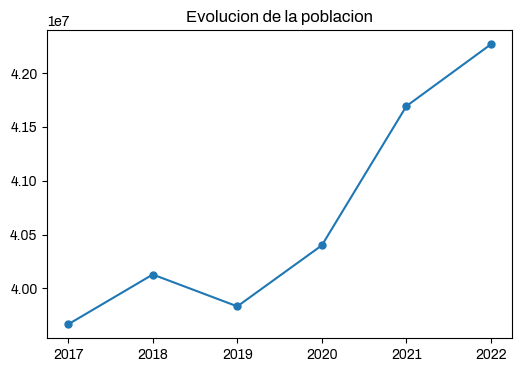

In [30]:
plt.figure(figsize=(6,4))
plt.title('Evolucion de la poblacion');
concatenated_df.loc['Population'].plot(marker='.', markersize=10)

In [42]:
# Merge the two dataframes and count the duplicates
merged_df = pd.merge(df_people_2021[['CODUSU', 'COMPONENTE']], df_people_2022[['CODUSU', 'COMPONENTE']], on=['CODUSU', 'COMPONENTE'], how='outer', indicator=True)

# Count the number of duplicate rows
duplicated_rows = merged_df['_merge'].value_counts()['both']

# Display the left-only rows (2021)
n_left_only_rows = merged_df['_merge'].value_counts()['left_only']

# Display the right-only rows (2022)
n_right_only_rows = merged_df['_merge'].value_counts()['right_only']

# Select the right-only and right both rows from merged_df
right_only_rows = merged_df[merged_df['_merge'] == 'right_only']
left_only_rows = merged_df[merged_df['_merge'] == 'left_only']
both_rows = merged_df[merged_df['_merge'] == 'both']
right_both_rows = pd.concat([both_rows, right_only_rows])

# Option 1: Merge two dataframes with "copies"
df_people_2021['rel_PONDERA'] = df_people_2021['PONDERA']/df_people_2021['PONDERA'].sum()
df_people_2022['rel_PONDERA'] = df_people_2022['PONDERA']/df_people_2022['PONDERA'].sum()

df_merged_with_copies = pd.concat([df_people_2021, df_people_2022])

# Option 2: Merge two dataframes erasing the first copy (keeping right only and right both observations)
df_people_2021_no_dupl = pd.merge(left_only_rows, df_people_2021, on=["CODUSU", "COMPONENTE"], how='inner')
df_people_2022_no_dupl = pd.merge(right_both_rows, df_people_2022, on=["CODUSU", "COMPONENTE"], how='inner')

df_merged_without_copies = pd.concat([df_people_2021_no_dupl, df_people_2022_no_dupl])

# Length of resulting dataframes
n_with_copies = len(df_merged_with_copies)
n_without_copies = len(df_merged_without_copies)


In [43]:
# Create a dictionary with the print information
print_dict = {
    "Number of duplicate rows between 2021 and 2022": duplicated_rows,
    "Left-only rows (2021)": n_left_only_rows,
    "Right-only rows (2022)": n_right_only_rows,
    "Length of dataframes with copies": n_with_copies,
    "Length of dataframes without copies": n_without_copies
}

# Create a dataframe from the dictionary
df_prints = pd.DataFrame.from_dict(print_dict, orient='index', columns=['Count'])

# Create a table from the dataframe
table_html = df_prints.to_html(classes='table table-striped')

# Display the table
display(HTML(table_html))

,Count
Number of duplicate rows between 2021 and 2022,30417
Left-only rows (2021),48100
Right-only rows (2022),47523
Length of dataframes with copies,155859
Length of dataframes without copies,127958


In [45]:
income_2021_grouped = calculate_grouped_income(df_people_2021, 2021)
income_2022_grouped = calculate_grouped_income(df_people_2022, 2022)
income_2021_grouped['income'] = income_2021_grouped[income_2021_grouped['income']!=-9]['income']/0.546358573 # Llevamos a los precios de 2022

# Hay poco n poblacional representando a los que mas ganan. Si los sacamos, estariamos subestimando aun mas ese fenomeno

In [ ]:
pathfigs = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/figs/'

plot_income_histogram(income_2021_grouped, 0, 200000, 0, 2500000, xlim=[-1e4, 4.5e6], ylim=[0, 2e7], filename=pathfigs + 'distribucion-ingreso-2021')
plot_income_histogram(income_2022_grouped, 0, 200000, 0, 2500000, xlim=[-1e4, 4.5e6], ylim=[0, 2e7], filename=pathfigs + 'distribucion-ingreso-2022')

In [ ]:
plot_income_histogram(income_2021_grouped[(income_2021_grouped['CH06'] < 65) & (income_2021_grouped['CH06'] >= 16)], 0, 200000, 0, 2500000, xlim=[-1e4, 4.5e6], ylim=[0, 2e7], filename=pathfigs + 'distribucion-ingreso-2021-16a65')
plot_income_histogram(income_2022_grouped[(income_2022_grouped['CH06'] < 65) & (income_2022_grouped['CH06'] >= 16)], 0, 200000, 0, 2500000, xlim=[-1e4, 4.5e6], ylim=[0, 2e7], filename=pathfigs + 'distribucion-ingreso-2022-16a65')

In [ ]:
# Reajusto los ejes cuando dejo las edades de 16 a 65

plot_income_histogram(income_2021_grouped[(income_2021_grouped['CH06'] < 65) & (income_2021_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-2021-16a65-ejescorregidos')

plot_income_histogram(income_2022_grouped[(income_2022_grouped['CH06'] < 65) & (income_2022_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-2022-16a65-ejescorregidos')

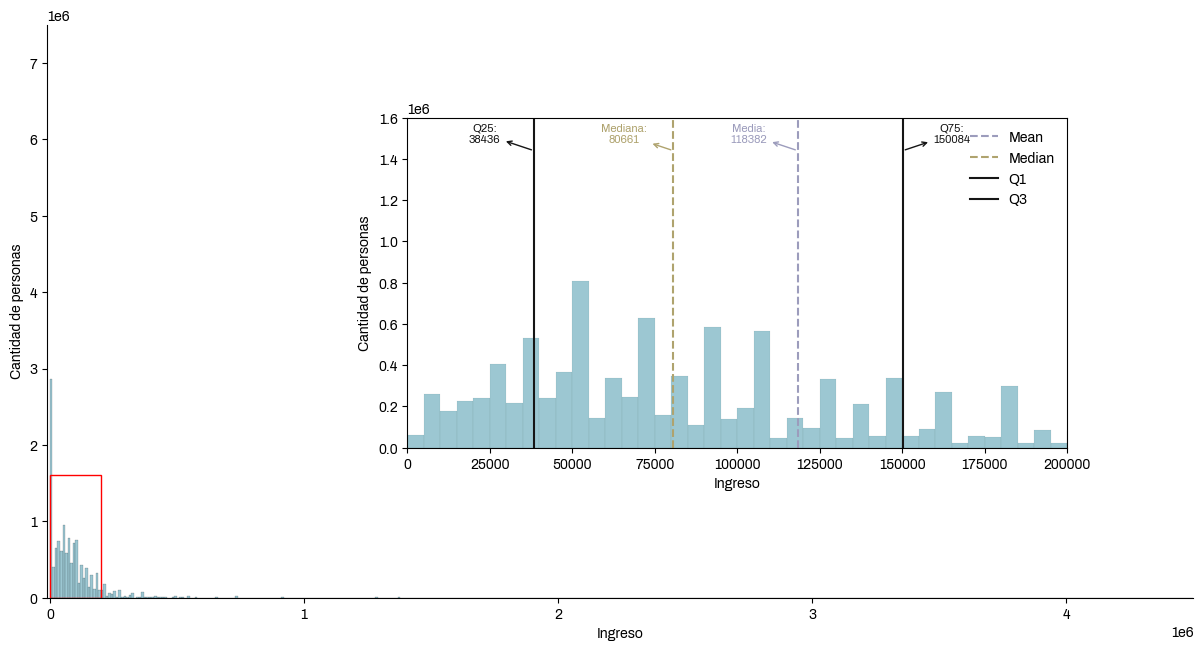

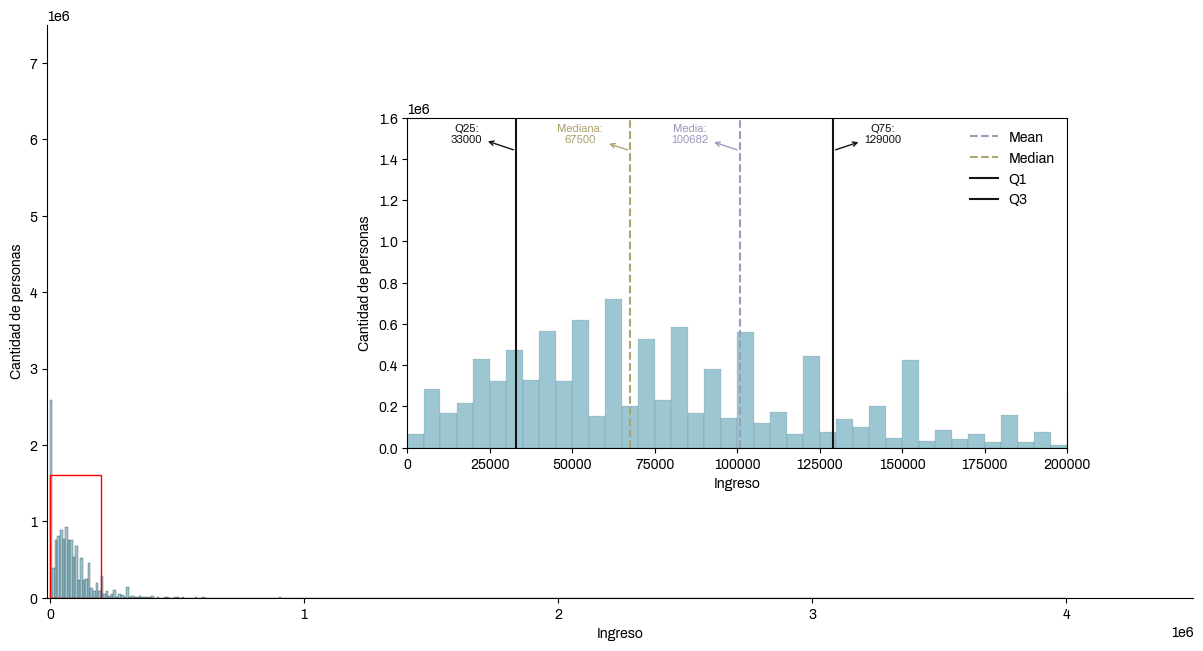

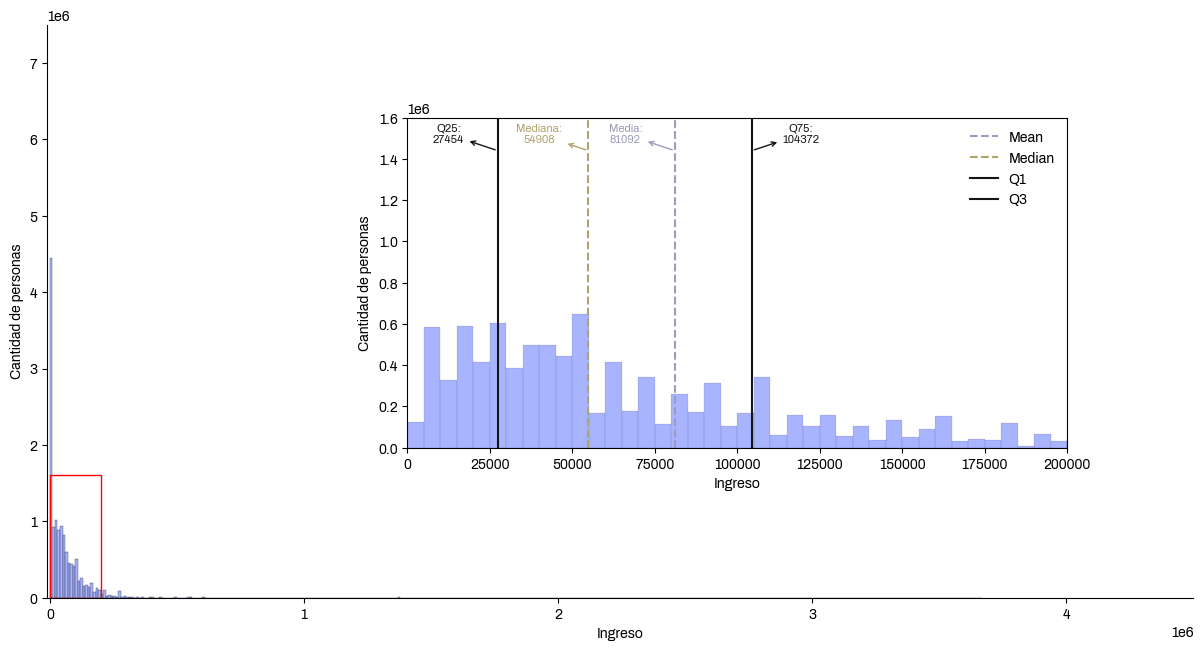

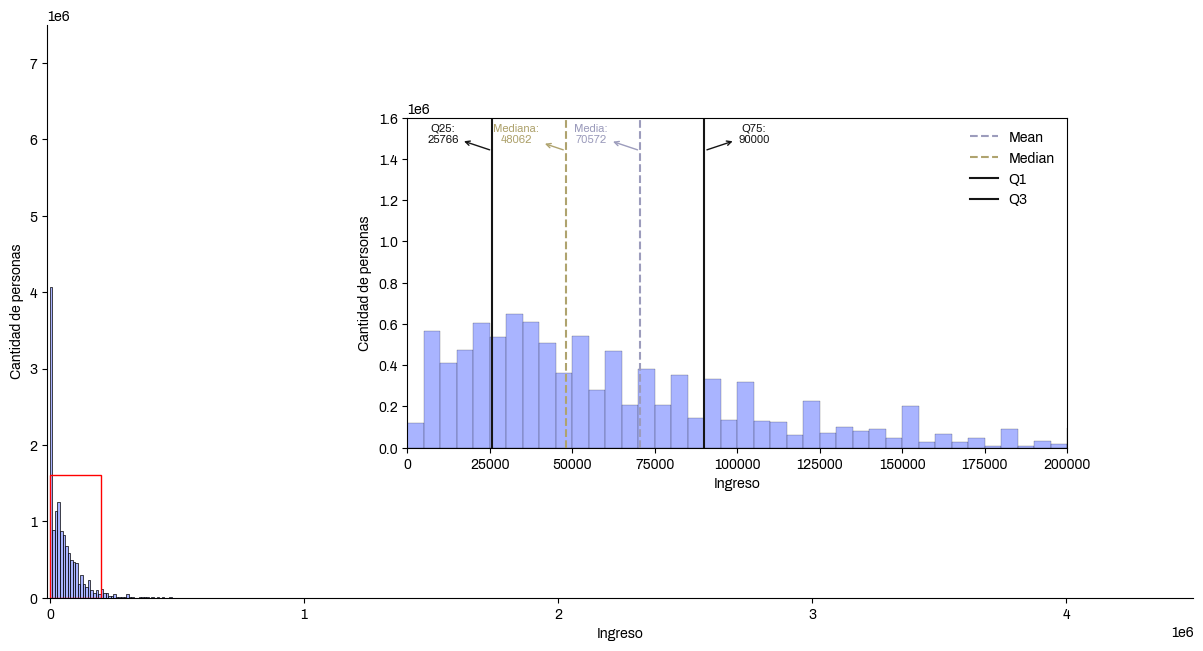

In [118]:
# Reajusto los ejes cuando dejo las edades de 16 a 65

plot_income_histogram_male(income_2021_grouped[(income_2021_grouped['CH06'] < 65) & (income_2021_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-male-2021-16a65-ejescorregidos')

plot_income_histogram_male(income_2022_grouped[(income_2022_grouped['CH06'] < 65) & (income_2022_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-male-2022-16a65-ejescorregidos')

plot_income_histogram_female(income_2021_grouped[(income_2021_grouped['CH06'] < 65) & (income_2021_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-female-2021-16a65-ejescorregidos')

plot_income_histogram_female(income_2022_grouped[(income_2022_grouped['CH06'] < 65) & (income_2022_grouped['CH06'] >= 16)], \
                      0, 200000, 0, 1600000, xlim=[-1e4, 4.5e6], ylim=[0, 7.5e6], \
                        filename=pathfigs + 'distribucion-ingreso-female-2022-16a65-ejescorregidos')